In [20]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import seaborn as sns

In [24]:
# Read in all data
raw = pd.read_excel('S&P_500_Researcher_Dataset_1979_-_2018.xlsx', sheet_name='Market Capitalizations')

In [65]:
raw_mkt_cap = raw
raw_mkt_cap.head()

,"Market Capitalizations of S&P 500 Companies (millions). If a company was not part of the index during the last day of a quarter/month, the value is blank.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270
0,Ticker,Company Name,1979-03-31 00:00:00,1979-06-30 00:00:00,1979-09-30 00:00:00,1979-12-31 00:00:00,1980-03-31 00:00:00,1980-06-30 00:00:00,1980-09-30 00:00:00,1980-12-31 00:00:00,...,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21564.3,23715.2,22152,21606.2,21165.8,19935.9,19910.2,21066.8,21545.3,22502.3
2,AA,Alcoa Inc,1909.12,1804.77,2070.04,1930.13,2060.13,2092.73,2600.14,2178.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24740.7,25829.6,25796.3,24285.6,20065.1,20350.2,17480.7,18208.2,18641.1,19032.5
4,AAL (Alex),Alexander & Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
raw_mkt_cap = raw_mkt_cap.rename(columns=raw_mkt_cap.iloc[0])
raw_mkt_cap.head()

,Ticker,Company Name,1979-03-31 00:00:00,1979-06-30 00:00:00,1979-09-30 00:00:00,1979-12-31 00:00:00,1980-03-31 00:00:00,1980-06-30 00:00:00,1980-09-30 00:00:00,1980-12-31 00:00:00,...,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00
0,Ticker,Company Name,1979-03-31 00:00:00,1979-06-30 00:00:00,1979-09-30 00:00:00,1979-12-31 00:00:00,1980-03-31 00:00:00,1980-06-30 00:00:00,1980-09-30 00:00:00,1980-12-31 00:00:00,...,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21564.3,23715.2,22152,21606.2,21165.8,19935.9,19910.2,21066.8,21545.3,22502.3
2,AA,Alcoa Inc,1909.12,1804.77,2070.04,1930.13,2060.13,2092.73,2600.14,2178.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24740.7,25829.6,25796.3,24285.6,20065.1,20350.2,17480.7,18208.2,18641.1,19032.5
4,AAL (Alex),Alexander & Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
raw_mkt_cap = raw_mkt_cap.iloc[1:]
raw_mkt_cap.head()

,Ticker,Company Name,1979-03-31 00:00:00,1979-06-30 00:00:00,1979-09-30 00:00:00,1979-12-31 00:00:00,1980-03-31 00:00:00,1980-06-30 00:00:00,1980-09-30 00:00:00,1980-12-31 00:00:00,...,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21564.3,23715.2,22152,21606.2,21165.8,19935.9,19910.2,21066.8,21545.3,22502.3
2,AA,Alcoa Inc,1909.12,1804.77,2070.04,1930.13,2060.13,2092.73,2600.14,2178.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24740.7,25829.6,25796.3,24285.6,20065.1,20350.2,17480.7,18208.2,18641.1,19032.5
4,AAL (Alex),Alexander & Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7370.68,8649.77,8447.19,8773.53,8470.1,9518.78,10042.7,10452,12139.4,12457.6


In [70]:
raw_mkt_cap.set_index('Ticker', inplace=True)

In [ ]:
clean = raw_mkt_cap.T

In [74]:
clean = clean.iloc[1:]
clean.head()

Ticker,A,AA,AAL,AAL (Alex),AAP,AAPL,ABBV,ABC,ABC (Bro.),ABI,...,MSCI,ABMD,EVRG,TWTR,FLT,HFC,BR,CPRT,ANET,WCG
1979-06-30 00:00:00,NaN,1804.77,NaN,NaN,NaN,NaN,NaN,NaN,1142.92,579.114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-09-30 00:00:00,NaN,2070.04,NaN,NaN,NaN,NaN,NaN,NaN,1276.01,589.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-12-31 00:00:00,NaN,1930.13,NaN,NaN,NaN,NaN,NaN,NaN,1092.84,825.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31 00:00:00,NaN,2060.13,NaN,NaN,NaN,NaN,NaN,NaN,895.936,772.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30 00:00:00,NaN,2092.73,NaN,NaN,NaN,NaN,NaN,NaN,815.873,934.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
clean = clean.rename(columns=raw_mkt_cap.iloc[0])
clean.head()

,1,2,3,4,5,6,7,8,9,10,...,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
Ticker,A,AA,AAL,AAL (Alex),AAP,AAPL,ABBV,ABC,ABC (Bro.),ABI,...,MSCI,ABMD,EVRG,TWTR,FLT,HFC,BR,CPRT,ANET,WCG
1979-03-31 00:00:00,NaN,1909.12,NaN,NaN,NaN,NaN,NaN,NaN,950.057,637.512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-06-30 00:00:00,NaN,1804.77,NaN,NaN,NaN,NaN,NaN,NaN,1142.92,579.114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-09-30 00:00:00,NaN,2070.04,NaN,NaN,NaN,NaN,NaN,NaN,1276.01,589.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-12-31 00:00:00,NaN,1930.13,NaN,NaN,NaN,NaN,NaN,NaN,1092.84,825.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
clean = clean.fillna(0)
clean.tail()

Ticker,A,AA,AAL,AAL (Alex),AAP,AAPL,ABBV,ABC,ABC (Bro.),ABI,...,MSCI,ABMD,EVRG,TWTR,FLT,HFC,BR,CPRT,ANET,WCG
2018-05-31 00:00:00,19935.94896,0.0,20350.16060,0.0,9518.78034,9.237511e+05,156995.02380,18049.77216,0.0,0.0,...,14608.54020,16913.08750,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000
2018-06-30 00:00:00,19910.19192,0.0,17480.65592,0.0,10042.74990,8.964724e+05,140283.95920,18494.72192,0.0,0.0,...,14695.64319,18356.52780,15255.28120,33056.26852,18616.61505,12065.64603,13386.130,0.00000,0.00000,0.00000
2018-07-31 00:00:00,21066.76000,0.0,18208.24908,0.0,10452.00861,9.215587e+05,139648.02544,17748.59968,0.0,0.0,...,14763.15627,15909.88828,15238.97992,24124.18772,19177.80900,13150.02018,13139.574,13329.11445,0.00000,0.00000
2018-08-31 00:00:00,21545.26000,0.0,18641.12096,0.0,12139.36821,1.102393e+06,145326.00544,19514.13312,0.0,0.0,...,16013.03658,18245.68408,15499.80040,26629.71208,18889.69998,13139.44092,15716.782,14936.31905,22361.01318,0.00000
2018-09-30 00:00:00,22502.26000,0.0,19032.54766,0.0,12457.59831,1.093240e+06,143206.22624,20002.14912,0.0,0.0,...,15759.86253,20182.98100,14921.10496,21542.96776,20135.81568,12324.83790,15345.785,11968.10015,19883.93526,16016.48775


In [91]:
test = clean.tail(400)
test.tail()

Ticker,A,AA,AAL,AAL (Alex),AAP,AAPL,ABBV,ABC,ABC (Bro.),ABI,...,MSCI,ABMD,EVRG,TWTR,FLT,HFC,BR,CPRT,ANET,WCG
2018-05-31 00:00:00,19935.94896,0.0,20350.16060,0.0,9518.78034,9.237511e+05,156995.02380,18049.77216,0.0,0.0,...,14608.54020,16913.08750,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000
2018-06-30 00:00:00,19910.19192,0.0,17480.65592,0.0,10042.74990,8.964724e+05,140283.95920,18494.72192,0.0,0.0,...,14695.64319,18356.52780,15255.28120,33056.26852,18616.61505,12065.64603,13386.130,0.00000,0.00000,0.00000
2018-07-31 00:00:00,21066.76000,0.0,18208.24908,0.0,10452.00861,9.215587e+05,139648.02544,17748.59968,0.0,0.0,...,14763.15627,15909.88828,15238.97992,24124.18772,19177.80900,13150.02018,13139.574,13329.11445,0.00000,0.00000
2018-08-31 00:00:00,21545.26000,0.0,18641.12096,0.0,12139.36821,1.102393e+06,145326.00544,19514.13312,0.0,0.0,...,16013.03658,18245.68408,15499.80040,26629.71208,18889.69998,13139.44092,15716.782,14936.31905,22361.01318,0.00000
2018-09-30 00:00:00,22502.26000,0.0,19032.54766,0.0,12457.59831,1.093240e+06,143206.22624,20002.14912,0.0,0.0,...,15759.86253,20182.98100,14921.10496,21542.96776,20135.81568,12324.83790,15345.785,11968.10015,19883.93526,16016.48775


In [92]:
test = test[['MSFT', 'AAPL', 'JNJ', 'GE']]

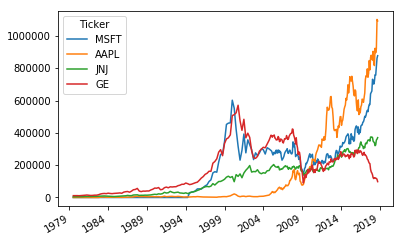

In [93]:
test.plot()